In [29]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('../data/base_prospect_clean.csv', encoding='ISO-8859-1')
df.head()


,code_cr,dept,effectif,ca_total_FL,ca_export_FK,risque,endettement,evo_benefice,ratio_benef,evo_effectif,evo_risque,age,type_com,activite,actionnaire,forme_jur_simpl,chgt_dir,rdv
0,GPVL,80,28,3362,0.0,moyen,0.646695,-2.285714,-0.535396,0.217,0,54,PÃ´le urbain,Commerce de gros et intermÃ©diaires du commerce,personne physique,Societe anonyme,0,0
1,GPVL,80,15,4607,0.0,faible,0.400985,0.392857,1.693076,0.000,0,52,PÃ´le urbain,Commerce de gros et intermÃ©diaires du commerce,famille,SociÃ©tÃ© par actions simplifiÃ©e,0,0
2,GPVL,80,19,21,0.0,moyen,0.972222,-0.666667,4.761905,0.000,0,52,Espace Ã dominante rurale,Industrie manufacturiÃ¨re : MÃ©tallurgie. trav...,pas d'actionnaire,SARL,0,0
3,GPVL,80,11,1065,0.0,eleve,0.485520,0.729167,-1.220657,-0.083,-1,51,PÃ´le urbain,Industrie alimentaire. bois.cuir,entreprise,SociÃ©tÃ© par actions simplifiÃ©e,0,0
4,GPVL,80,17,2576,228.0,moyen,0.612903,-2.012270,-6.405280,0.000,-1,51,PÃ´le urbain,Industrie manufacturiÃ¨re : MÃ©tallurgie. trav...,pas d'actionnaire,SociÃ©tÃ© par actions simplifiÃ©e,0,0


In [ ]:
df.shape

In [21]:
df_active = df.select_dtypes(exclude=[object])
df_active

,dept,effectif,ca_total_FL,ca_export_FK,endettement,evo_benefice,ratio_benef,evo_effectif,evo_risque,age,chgt_dir,rdv
0,80,28,3362,0.0,0.646695,-2.285714,-0.535396,0.217000,0,54,0,0
1,80,15,4607,0.0,0.400985,0.392857,1.693076,0.000000,0,52,0,0
2,80,19,21,0.0,0.972222,-0.666667,4.761905,0.000000,0,52,0,0
3,80,11,1065,0.0,0.485520,0.729167,-1.220657,-0.083000,-1,51,0,0
4,80,17,2576,228.0,0.612903,-2.012270,-6.405280,0.000000,-1,51,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
108432,13,16,2141,1.0,0.466483,4.341117,9.513534,-0.126244,0,15,0,0
108433,61,43,5442,352.0,0.841737,0.229162,-6.145799,0.027814,0,7,0,0
108434,63,146,16264,1.0,0.101439,0.834199,5.023770,0.027260,0,45,0,0
108435,21,203,71067,33556.0,0.518589,2.682676,10.180021,0.000000,0,22,0,0


In [22]:
scaler = StandardScaler()
scaler.fit(df_active)
standardized_df = scaler.transform(df_active)
standardized_df

array([[ 1.04063223, -0.08144467, -0.08859078, ...,  2.37514473,
        -0.36616468, -0.33936857],
       [ 1.04063223, -0.17710879, -0.05884413, ...,  2.22370717,
        -0.36616468, -0.33936857],
       [ 1.04063223, -0.14767368, -0.16841694, ...,  2.22370717,
        -0.36616468, -0.33936857],
       ...,
       [ 0.42646856,  0.78689118,  0.21967534, ...,  1.69367571,
        -0.36616468, -0.33936857],
       [-1.09087699,  1.20634155,  1.52907764, ..., -0.04785624,
        -0.36616468, -0.33936857],
       [ 0.46259583, -0.12559734, -0.10206638, ...,  0.25501889,
         2.7310116 , -0.33936857]])

In [36]:
pca = PCA(svd_solver='full')
pca_base_prospect = pca.fit_transform(standardized_df)
print("ACP composants :",pca.n_components_)
pca_exp_var = pca.explained_variance_ratio_
print("ACP score variance :",pca_exp_var)
print("Inertie expliquée :",pca_exp_var.sum())
cum_sum_expl_var = np.cumsum(pca_exp_var)
print(cum_sum_expl_var)

ACP composants : 12
ACP score variance : [0.15677883 0.10185733 0.09005856 0.08658564 0.08341743 0.08315838
 0.08221415 0.08041854 0.07840866 0.06921995 0.05599884 0.03188369]
Inertie expliquée : 1.0000000000000002
[0.15677883 0.25863616 0.34869472 0.43528036 0.51869779 0.60185617
 0.68407032 0.76448886 0.84289752 0.91211747 0.96811631 1.        ]


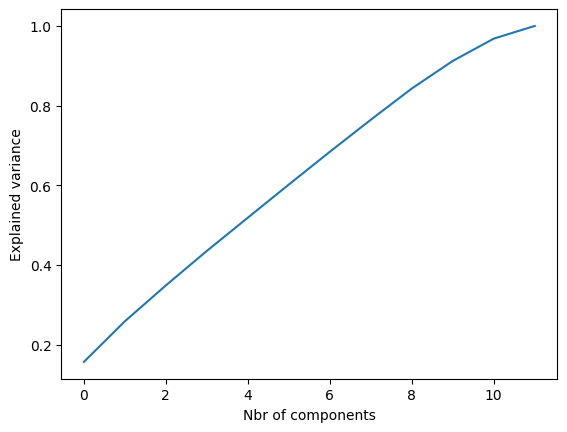

In [43]:
plt.plot(cum_sum_expl_var)
plt.xlabel("Nbr of components")
plt.ylabel("Explained variance")
plt.savefig('../fig/elbow_plot')



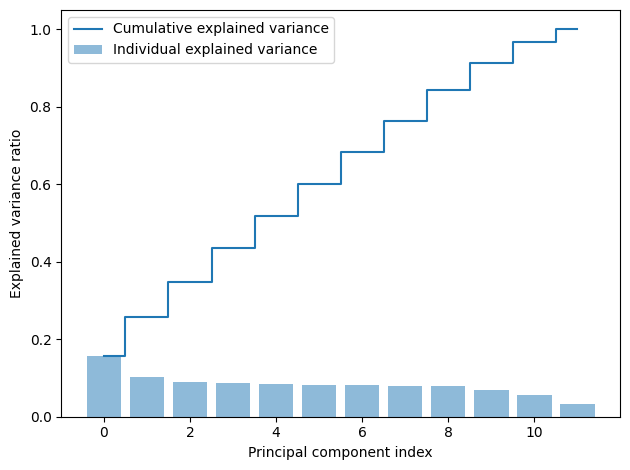

In [46]:
fig = plt.figure()
plt.bar(range(0,len(pca_exp_var)), pca_exp_var, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_expl_var)), cum_sum_expl_var, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../fig/acp_expl_var')


In [47]:
pca2 = PCA(n_components=2)
pca2_base_prospect = pca2.fit_transform(standardized_df)
pca2_exp_var = pca2.explained_variance_ratio_
print("ACP score variance :",pca2_exp_var)
print("Inertie expliquée :",pca2_exp_var.sum())
cum_sum_expl_var2 = np.cumsum(pca2_exp_var)
print(cum_sum_expl_var2)

ACP score variance : [0.15677883 0.10185733]
Inertie expliquée : 0.25863615990708916
[0.15677883 0.25863616]


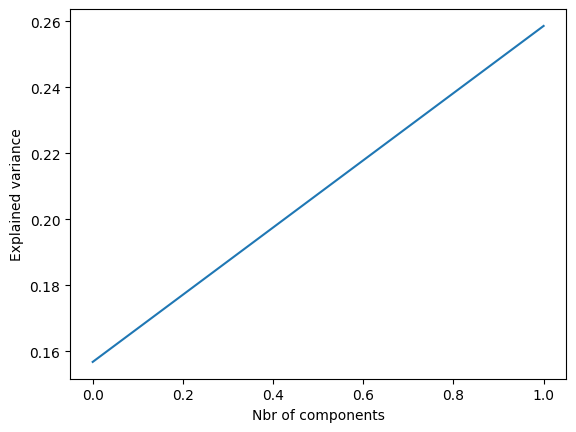

In [48]:
plt.plot(cum_sum_expl_var2)
plt.xlabel("Nbr of components")
plt.ylabel("Explained variance")
plt.savefig('../fig/elbow_plot_2')